# Recent image

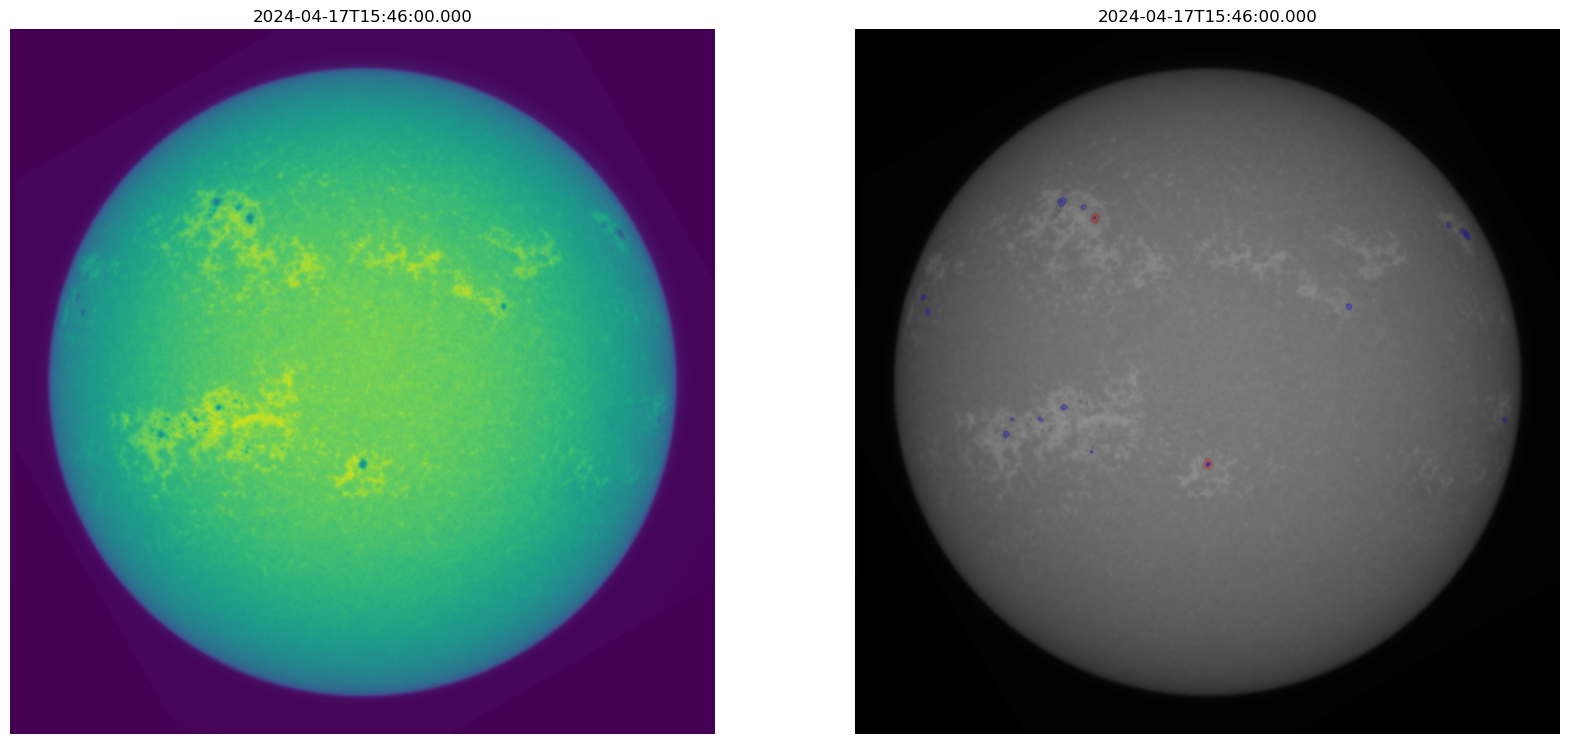

In [1]:
from module import toSunpyMap, getMostRecent, drawSunspots
import matplotlib.pyplot as plt

directory = 'Y:/data/CLIMSO/2024/data_calibrated'

file = getMostRecent(directory, '_l2_')

map = toSunpyMap(file, center_disk=True)

img = drawSunspots(map)

plt.figure(figsize=(20,20))

plt.subplot(121)
plt.imshow(map.data, origin='lower')
plt.axis('off')
plt.title(map.date);

plt.subplot(122)
plt.imshow(img, origin='lower')
plt.axis('off')
plt.title(map.date);

In [2]:
from module import groupSunspots, assignNOAAToTable

table = groupSunspots(map)

table = assignNOAAToTable(table, map)

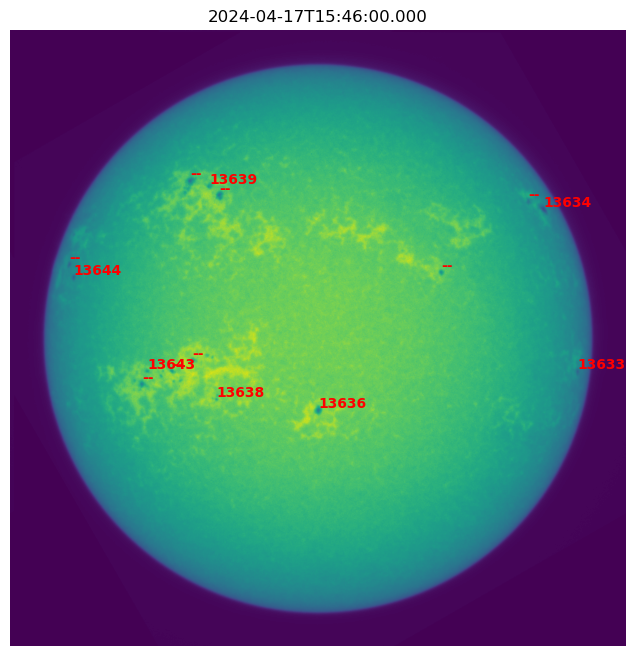

In [3]:
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection=map)
plt.imshow(map.data, axes=ax, origin='lower')
plt.axis('off')
plt.title(map.date);

for region in table:
    ax.plot_coord(SkyCoord(region['longitude'],
                region['latitude'], 
                obstime=map.date,
                observer='earth', 
                frame=frames.HeliographicStonyhurst,
                ).transform_to(map.coordinate_frame), '')
    ax.annotate( region['noaa'],
                (region['longitude'].value, region['latitude'].value),
                xycoords=ax.get_transform('heliographic_stonyhurst'),
                color='red',
                fontweight='bold',
                horizontalalignment='left', verticalalignment='bottom')


In [4]:
table

label,id,noaa,longitude,latitude,x,y
,,,deg,deg,pix,pix
uint16,int32,int32,float64,float64,float64,float64
1,--,13636,0.06830791752048425,-20.94452852785169,1025.0,783.0
2,--,13638,-23.26563801777263,-18.15160357752213,687.0,819.0
3,--,--,-42.285323272649805,-13.888462282419573,438.0,870.0
4,--,13633,77.11570734443228,-8.486114066744806,1887.0,911.0
5,--,--,-33.55564660583025,-11.600178577529825,538.0,913.0
6,--,13643,-40.19382963880679,-11.233153065470209,456.0,913.0
7,--,--,-28.251159345639905,-9.60249957995706,605.0,948.0
8,--,13644,-67.6176928998674,10.96587448232661,211.0,1225.0
